In [6]:
pip install mplsoccer

  Stored in directory: C:\Users\giuse\AppData\Local\pip\Cache\wheels\1e\89\34\a6679a2c0b05f035f97ccc671f73139d2859b7612995416d2a
Successfully built mplsoccer
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [6]:
#Leggi i dati
df = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/passmap/main/messibetis.csv')

In [7]:
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

In [8]:
df.head(10)

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4
5,messi,47,42,87.6,20.0,Pass,Successful,84.0,43.2
6,messi,49,47,90.0,34.4,Pass,Unsuccessful,98.4,30.4
7,messi,50,10,94.8,24.8,Pass,Successful,104.4,19.2
8,messi,50,17,98.4,41.6,Pass,Successful,111.6,54.4
9,messi,50,24,117.6,49.6,Pass,Unsuccessful,117.6,48.8


Text(0.5, 1.0, 'Mappa passaggi Messi vs RealBetis')

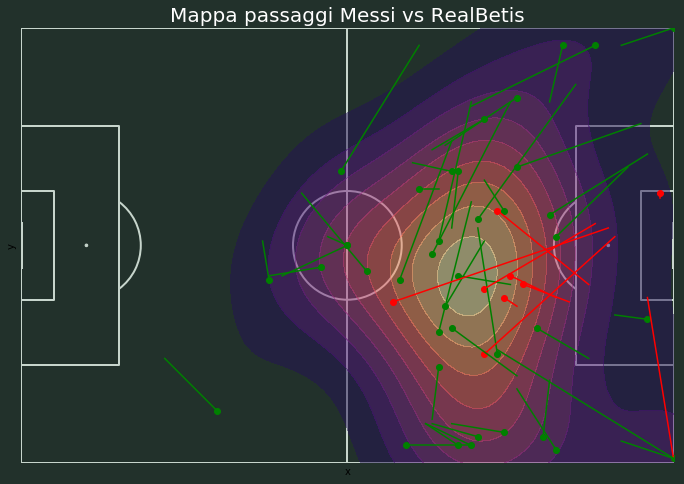

In [9]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')


pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)


pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#Heatmap
kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)


#loop per ogni passaggio
for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green')
        plt.scatter(df['x'][x],df['y'][x],color='green')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
        plt.scatter(df['x'][x],df['y'][x],color='red')
        
plt.xlim(0,120)
plt.ylim(0,80)

plt.title('Mappa passaggi Messi vs RealBetis',color='white',size=20)